Accuracy: 0.9442250740375123
Precision: 0.7729591836734694
Recall: 0.926605504587156
F1 Score: 0.8428372739916551
ROC AUC Score: 0.9851270670100958
      Metric     Value
0   Accuracy  0.944225
1  Precision  0.772959
2     Recall  0.926606
3   F1 Score  0.842837
4    ROC AUC  0.985127


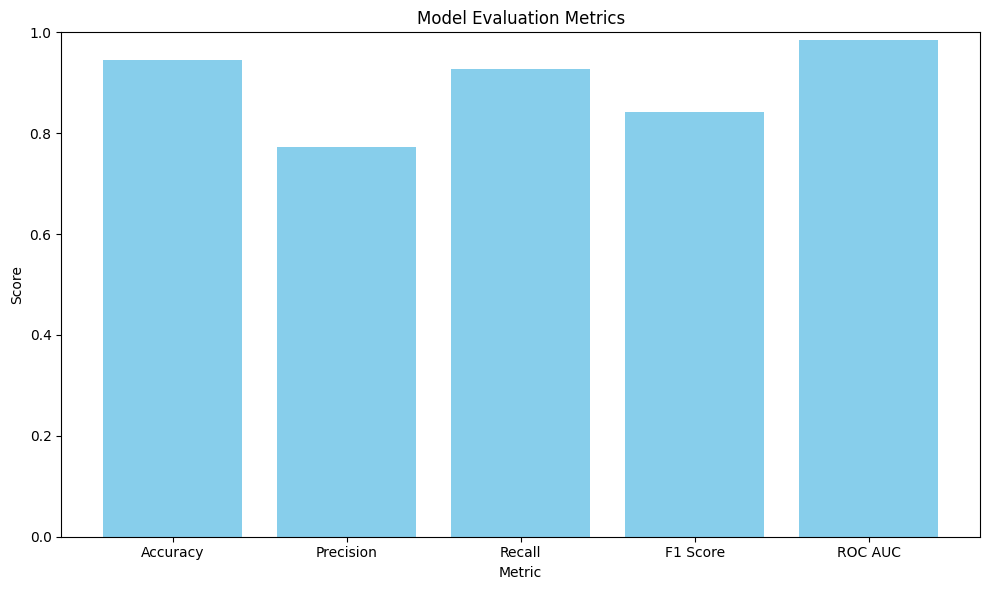

In [4]:
# 논문1_A Novel Machine Learning Approach For Handling Imbalanced Data Leveraging SMOTE-ENN and XGBoost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 데이터셋 불러오기
file_path = '/content/BankChurners.csv'
df = pd.read_csv(file_path)

# 데이터 전처리
# Naive Bayes 관련 열 제거
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

# 불필요한 열 제거 ('CLIENTNUM')
df.drop(columns=['CLIENTNUM'], inplace=True)

# 범주형 변수를 수치형으로 매핑
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['Education_Level'] = df['Education_Level'].map({
    'Unknown':0, 'Uneducated': 1, 'High School': 2, 'College': 3,
    'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6
})
df['Marital_Status'] = df['Marital_Status'].map({'Unknown':0, 'Single': 1, 'Married': 2, 'Divorced': 3})
df['Income_Category'] = df['Income_Category'].map({
    'Unknown':0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3,
    '$80K - $120K': 4, '$120K +': 5
})
df['Card_Category'] = df['Card_Category'].map({'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4})

# 목표 변수와 특성 변수 분리
target_column = 'Attrition_Flag'
X = df.drop(target_column, axis=1)
y = df[target_column]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 클래스 불균형 처리 (SMOTE-ENN 사용)
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# 데이터 스케일링
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# XGBoost 모델 정의 및 학습
model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=10, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 예측 수행
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 평가 결과 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# 평가 결과 데이터프레임으로 변환 및 표시
evaluation_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
})
print(evaluation_results)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(evaluation_results['Metric'], evaluation_results['Value'], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
